DEEP LEARNING 

## 1. Show that the softmax function is invariant to constant offsets to its input,i.e.𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑎 + 𝑐1) = 𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑎), where 𝑐 ∈ 𝑅 is some constant and 1 denotes a column vector of 1s.

softmax(a + c1) = exp(a + c1)/∑kj = 1 exp(a + c1)

= exp(a) ·exp(c1)/∑kj = 1exp(a) ·exp(c1)

= exp(a)/∑kj = 1exp(a)

= softmax(a)


## 2. In practice, why is the observation that the softmax function is invariant to constant offsets to its input important when implementing it in a neural network?

Softmax function returns the unchanged result after adding constant offsets to its original input. This property of the softmax function is very important when it comes to the implementation in a neural network because it provides numerical stability in the calculation. In practice, the input (a vector) to the softmax function could have a large range of values(extreme values), and this situation could potentially cause either underflow or overflow to the softmax function; however, if we subtract the maximum value in the vector from the whole vector and apply to the softmax function, we could largely reduce the risk of numerical error caused by extreme values in the vector.


# Problem 2: Training a CNN using CIFAR-10 Data

## 1. Warm-up: Load the dataset and check how the images look like

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.python.client import device_lib

#check GPU
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15057237430221662228
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4463355700594883407
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the image data to [0, 1] range
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Print the shape of the data
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")


170498071/170498071 [==============================] - 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


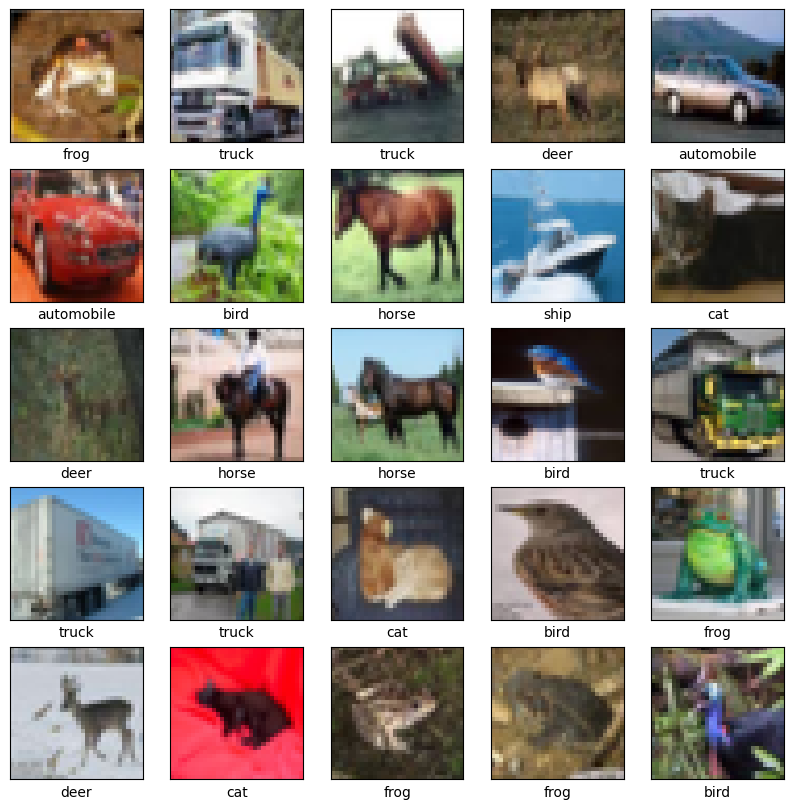

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 2. Train a CNN with three hidden convolutional layers that use the ReLU activation function. Use 64 11×11 filters for the first layer, followed by 2×2 max pooling (stride of 2). The next two convolutional layers will use 128 3×3 filters followed by the ReLU activation function. Prior to the softmax layer, you should have an average pooling layer that pools across the preceding feature map. Do not use a pre-trained CNN. Train your model using all of the CIFAR-10 training data, and evaluate your trained system on the CIFAR-10 test data. Display the training loss as a function of epochs. What is the accuracy on the test data? How did you initialize the weights? Discuss your architecture and hyper-parameters.

In [ ]:
#define the CNN model
model = keras.Sequential([
    #64 11*11 convolutional layer
    keras.layers.Conv2D(64, (11, 11), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    #two layers of 128 3*3
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    #average pooling layer before softmax
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#train the model
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

#evaluate the model with test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8597 - accuracy: 0.3033 - val_loss: 1.6856 - val_accuracy: 0.3613
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5646 - accuracy: 0.4254 - val_loss: 1.5074 - val_accuracy: 0.4466
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4468 - accuracy: 0.4758 - val_loss: 1.4337 - val_accuracy: 0.4804
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3677 - accuracy: 0.5079 - val_loss: 1.3893 - val_accuracy: 0.5048
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2971 - accuracy: 0.5370 - val_loss: 1.2655 - val_accuracy: 0.5509
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2454 - accuracy: 0.5579 - val_loss: 1.2338 - val_accuracy: 0.5620
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1977 - accuracy: 0.5736 - val_loss: 1.1951 - val_accu

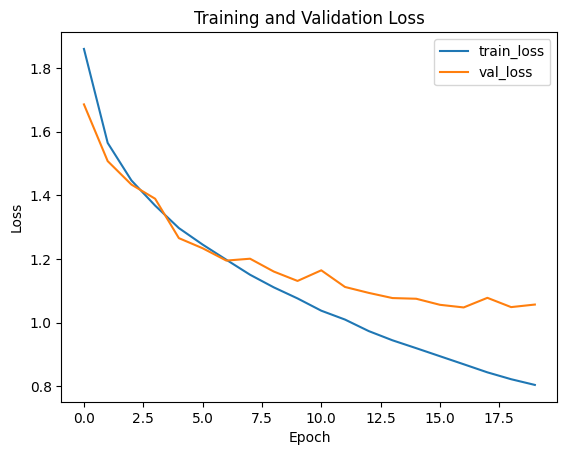

In [ ]:
#plot the loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

Text(0.5, 1.0, 'Prediction Accuracy')

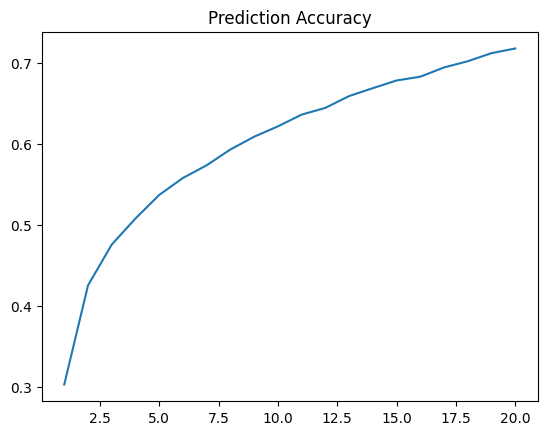

In [ ]:
h=history.history['accuracy']
plt.plot(range(1,len(h)+1),h)
plt.title("Prediction Accuracy")

Discussion:
The test accuracy achieved by our model with 20 epochs is approximately 0.6420.In our model, indicating that the model correctly classified 64.20% of the images it had never seen before. The initial test accuracy of our model with 10 epochs is 0.60 then we tried 50 epochs with the test accuracy of 0.6402. We discorvey that as we increase the number of the epoch, the accuracy increases but also increase the risk of overfitting if there is a big gap between the test and training results. However, our final model's test results and trianing results are close while the test accuracy is relatively high, indicating low risk of overfitting and good performance.

The default weight initialization for each layer in Keras is used. We leave it to Keras to initialize the weights of each layer using a method specific to the layer type.

The chosen architecture begins with a large size (11x11) in the first convolutional layer, which helps in capturing spatial hierarchies and larger features initially, in addition, The ReLU activation function introduces non-linearity, enabling the model to learn more complex patterns. Max pooling layers help in down-sampling the feature maps, reducing computational load and potential overfitting. The next two convolutional layers use smaller size (3x3) to capture finer details.Finally, the Dense Layer provides the predicted output classes.

## 3. Visualize all of the 11×11×3 filters learned by the first convolutional layer as an RGB image array

In [ ]:
#extract layer from our model
first_conv_layer = model.layers[0]
filters, biases = first_conv_layer.get_weights()

#normalize layer
normalized_filters = np.zeros_like(filters)
for i in range(filters.shape[3]):
    filter = filters[:, :, :, i]
    min_val = np.min(filter)
    max_val = np.max(filter)
    normalized_filter = (filter - min_val) / (max_val - min_val)
    normalized_filters[:, :, :, i] = normalized_filter


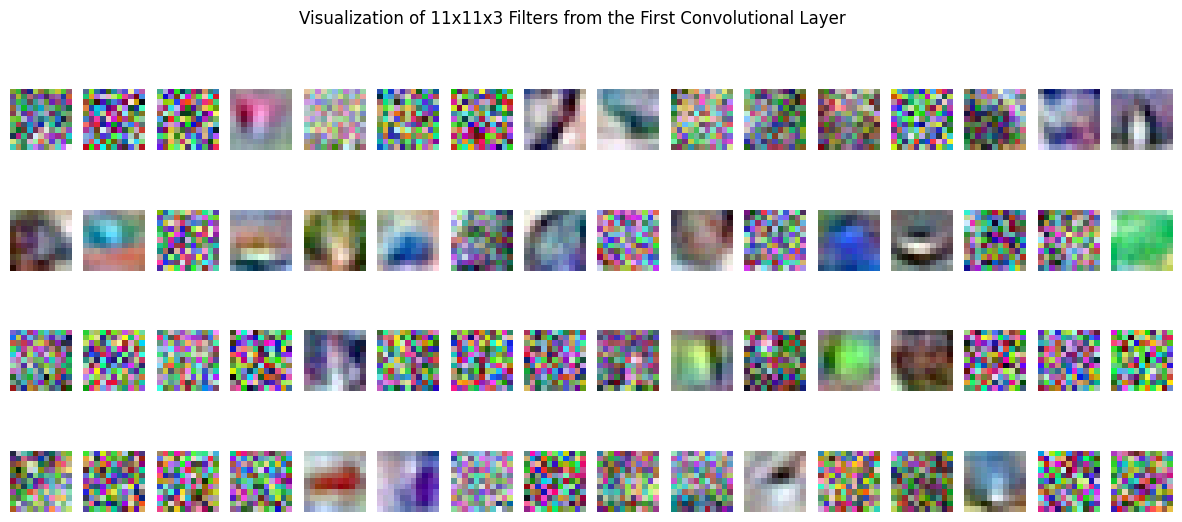

In [ ]:
#define the number of filters and channels
n_filters = normalized_filters.shape[3]
n_channels = normalized_filters.shape[2]

#make the grid size to 4 rows and 16 colums
grid_r, grid_c = 4, 16

fig, axes = plt.subplots(grid_r, grid_c, figsize=(15, 6))

# Plot each filter
for i, ax in enumerate(axes.flat):
    if i < n_filters:
        img = normalized_filters[:, :, :, i]
        ax.imshow(img)
    ax.axis('off')

plt.suptitle('Visualization of Filters from the First Layer')

# Show the plot
plt.show()

## 4.Using the same architecture, add in batch normalization between each of the hidden layers. Compare the training loss with and without batch normalization as a function of epochs. What is the final test error? Visualize the filters.

In [ ]:

#define the CNN model
model_n = keras.Sequential([
    #64 11*11 convolutional layer
    keras.layers.Conv2D(64, (11, 11), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.BatchNormalization(),
    #two layers of 128 3*3
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #average pooling layer before softmax
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(10, activation='softmax')
])

model_n.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


In [ ]:
#train the model
history_n = model_n.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

#evaluate the model with test data
test_loss, test_acc = model_n.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5489 - accuracy: 0.4368 - val_loss: 1.5898 - val_accuracy: 0.4340
Epoch 2/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2488 - accuracy: 0.5563 - val_loss: 1.5090 - val_accuracy: 0.4647
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0943 - accuracy: 0.6145 - val_loss: 1.6966 - val_accuracy: 0.4111
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9881 - accuracy: 0.6524 - val_loss: 1.1417 - val_accuracy: 0.6007
Epoch 5/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9018 - accuracy: 0.6847 - val_loss: 1.2127 - val_accuracy: 0.5822
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8370 - accuracy: 0.7082 - val_loss: 1.6054 - val_accuracy: 0.5282
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7762 - accuracy: 0.7291 - val_loss: 1.0486 - val_ac

In [ ]:
test_loss_n, test_acc_n = model_n.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy with Batch Normalization: {test_acc_n}")

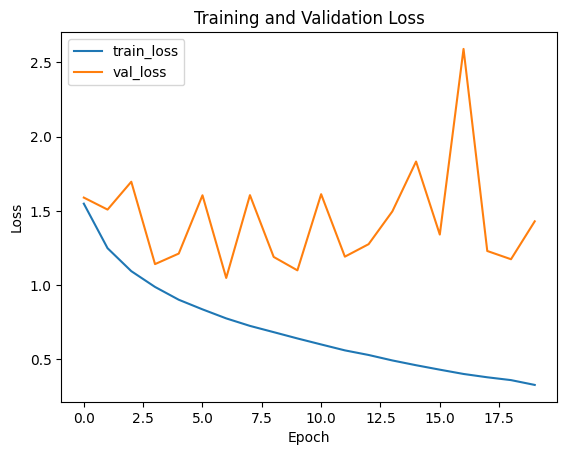

In [ ]:
#plot the loss
plt.plot(history_n.history['loss'], label='train_loss')
plt.plot(history_n.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

Text(0.5, 1.0, 'Prediction Accuracy')

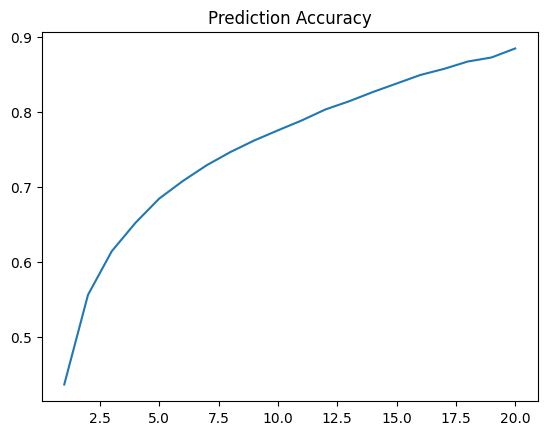

In [ ]:
#plot the test accuracy
h=history_n.history['accuracy']
plt.plot(range(1,len(h)+1),h)
plt.title("Prediction Accuracy")

The Training Loss with batch normalization decresed from 0.8 to 0.32 by batch normalization. The batch normalization helps in stabilizing and accelerating the training process by normalizing the input of each layer. In results the training and validation losses with batch normalization are more stable and lower than without batch normalization, indicating better convergence. Usually the batch normalization will increase the test accuracy, however, in this case the test accuracy of new model suddenly dropped from 0.67 to 0.57 between 19 and 20 epoch, and it might casued by the overfitting.

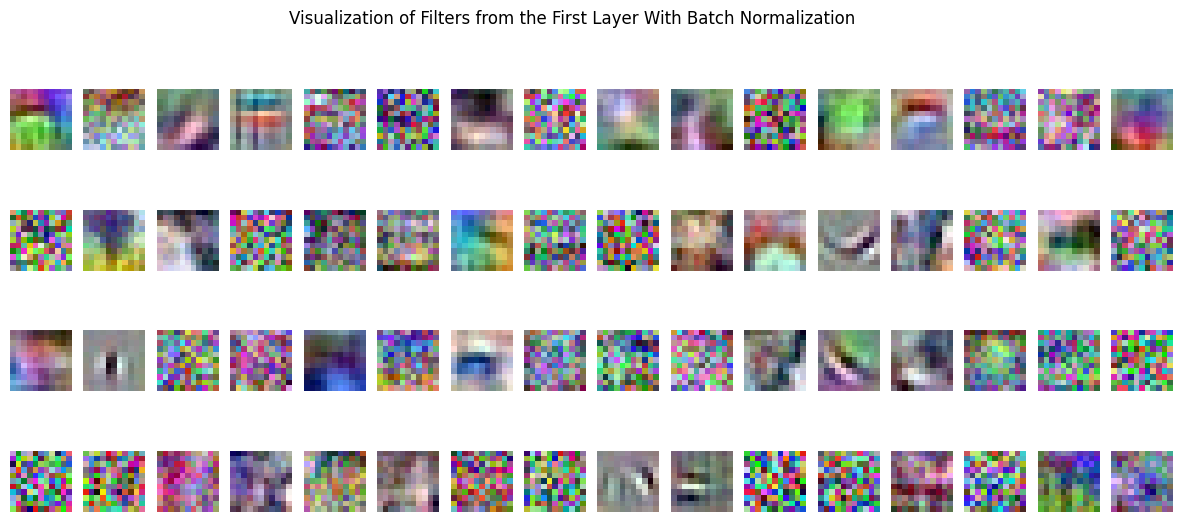

In [ ]:
#visualize the filter
#extract layer from our model
first_conv_layer_n = model_n.layers[0]
filters_n, biases_n = first_conv_layer_n.get_weights()

#normalize layer
normalized_filters_n = np.zeros_like(filters_n)
for i in range(filters_n.shape[3]):
    filter_n = filters_n[:, :, :, i]
    min_val_n = np.min(filter_n)
    max_val_n = np.max(filter_n)
    normalized_filter_n = (filter_n - min_val_n) / (max_val_n - min_val_n)
    normalized_filters_n[:, :, :, i] = normalized_filter_n


n_filters_n = normalized_filters_n.shape[3]
n_channels_n = normalized_filters_n.shape[2]
grid_r_n, grid_c_n = 4, 16  # 4 rows and 16 columns
fig_n, axes_n = plt.subplots(grid_r_n, grid_c_n, figsize=(15, 6))

for i, ax in enumerate(axes_n.flat):
    if i < n_filters_n:
        # Get the filter
        img_n = normalized_filters_n[:, :, :, i]
        ax.imshow(img_n)
    ax.axis('off')

plt.suptitle('Visualization of Filters from the First Layer With Batch Normalization')
plt.show()

# Problem 3: GAN using Fasion-MNIST Data

#PART 1. Vanilla GAN

Training a Generative Adversarial Network (GAN) using the Fashion-MNIST dataset, we'll follow the steps below:

**1.Setup:** We'll import necessary libraries and the Fashion-MNIST dataset.

**2.Build the models:** Create the Generator (G) and Discriminator (D).

**3.Training loop:** Implement the training loop using the pseudocode provided.

**4.Visualization:** Plot training loss curves and show generated images at different stages of training.

#Step 1: Setup

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils
import copy  # Needed for Unrolled GAN

# Set device for PyTorch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformation to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] for tanh compatibility
])

# Load Fashion-MNIST dataset
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# Optionally, load test dataset if needed for validation or testing
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)


100%|██████████| 26421880/26421880 [00:03<00:00, 6713642.41it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205728.53it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3872864.53it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7021878.70it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



#Step 2: Define the Generator and Discriminator

In [ ]:
# Generator Model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)



#Step 3: Setup Training

In [ ]:
# Instantiate the models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Loss function
criterion = nn.BCELoss()

# Fixed noise for visualizing progress
fixed_noise = torch.randn(64, 100, device=device)  # Sample noise for generating images


#Step 4: Training Loop

In [ ]:
# Number of epochs
num_epochs = 50

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []

for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        b_size = real_images.size(0)

        # Train Discriminator
        discriminator.zero_grad()
        label_real = torch.full((b_size,), 1., device=device)
        output_real = discriminator(real_images).view(-1)
        loss_D_real = criterion(output_real, label_real)
        loss_D_real.backward()

        noise = torch.randn(b_size, 100, device=device)
        fake_images = generator(noise)
        label_fake = torch.full((b_size,), 0., device=device)
        output_fake = discriminator(fake_images.detach()).view(-1)
        loss_D_fake = criterion(output_fake, label_fake)
        loss_D_fake.backward()
        optimizer_D.step()

        # Train Generator
        generator.zero_grad()
        label_G = torch.full((b_size,), 1., device=device)  # Fake labels are real for generator cost
        output_G = discriminator(fake_images).view(-1)
        loss_G = criterion(output_G, label_G)
        loss_G.backward()
        optimizer_G.step()

        # Output training stats
        if i % 100 == 0:
            print(f'[{epoch}/{num_epochs}][{i}/{len(train_loader)}]\tLoss_D: {loss_D_real+loss_D_fake:.4f}\tLoss_G: {loss_G:.4f}')

        # Save Losses for plotting later
        G_losses.append(loss_G.item())
        D_losses.append((loss_D_real + loss_D_fake).item())

    # Check how the generator is doing by saving G's output on fixed_noise
    with torch.no_grad():
        fake = generator(fixed_noise).detach().cpu()
    img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

    # Show generated images every epoch
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Generated Images")
    plt.imshow(np.transpose(img_list[-1],(1,2,0)))
    plt.show()


#Step 5: Visualization of Training Losses and Generated Images

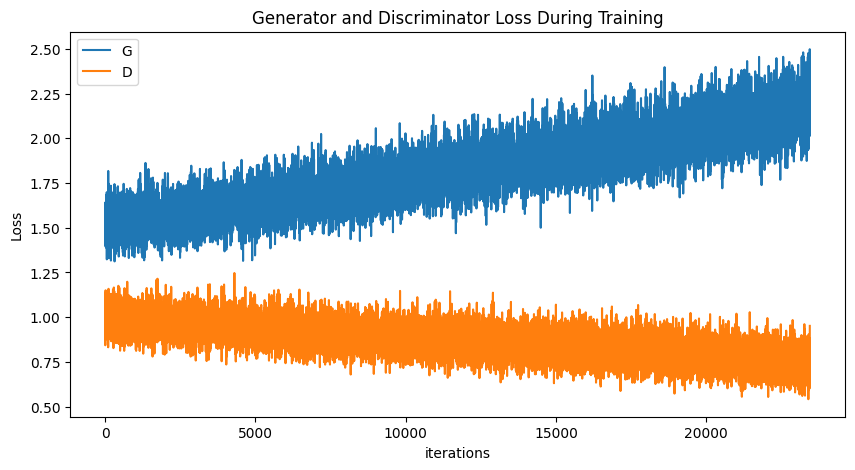

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


**#PART 2 : Mode Collapse in GANs**

#Part 2.1: Modify Discriminator for Classification

**Step 1:** Modify the Discriminator
We'll alter the final output layer of the discriminator to output 10 classes instead of a single value.

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # Reuse the Discriminator architecture but change the output layer
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)  # Output layer for 10 classes
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)


#Step 2: Train the Classifier

In [ ]:
classifier = Classifier().to(device)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

def train_classifier():
    classifier.train()
    for epoch in range(10):  # A few epochs should suffice for this dataset
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = classifier(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            print(f"Epoch {epoch+1}, Loss: {loss.item()}")

train_classifier()


Epoch 1, Loss: 2.308577537536621
Epoch 1, Loss: 2.188264846801758
Epoch 1, Loss: 2.039156436920166
Epoch 1, Loss: 1.922124981880188
Epoch 1, Loss: 1.5336030721664429
Epoch 1, Loss: 1.347853660583496
Epoch 1, Loss: 1.1952499151229858
Epoch 1, Loss: 0.9562311768531799
Epoch 1, Loss: 1.05943763256073
Epoch 1, Loss: 0.936399519443512
Epoch 1, Loss: 0.9106788039207458
Epoch 1, Loss: 1.0190489292144775
Epoch 1, Loss: 0.938159704208374
Epoch 1, Loss: 0.9965352416038513
Epoch 1, Loss: 1.2439924478530884
Epoch 1, Loss: 0.9067097306251526
Epoch 1, Loss: 0.9755300283432007
Epoch 1, Loss: 0.9863321781158447
Epoch 1, Loss: 0.8391864895820618
Epoch 1, Loss: 0.9086996912956238
Epoch 1, Loss: 0.8427008986473083
Epoch 1, Loss: 0.8796794414520264
Epoch 1, Loss: 0.9136046171188354
Epoch 1, Loss: 0.8783296346664429
Epoch 1, Loss: 0.6587203145027161
Epoch 1, Loss: 0.8308465480804443
Epoch 1, Loss: 0.6756941676139832
Epoch 1, Loss: 0.7649304866790771
Epoch 1, Loss: 0.7358558773994446
Epoch 1, Loss: 0.582984

#Step 3: Evaluate the Classifier

##Step 3.1: Load the IDX files

In [ ]:


import os
import gzip
import numpy as np

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        # First 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # Next 4 bytes is the number of images
        number_of_images = int.from_bytes(f.read(4), 'big')
        # Next 4 bytes is the number of rows
        rows = int.from_bytes(f.read(4), 'big')
        # Next 4 bytes is the number of columns
        cols = int.from_bytes(f.read(4), 'big')
        # Rest is the image pixel data, each pixel is represented by one byte
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((number_of_images, rows, cols))
        return images

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        # First 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # Next 4 bytes is the number of labels
        number_of_labels = int.from_bytes(f.read(4), 'big')
        # Rest is the label data, each label is represented by one byte
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels


##Step 3.2: Convert Data for PyTorch

In [ ]:



import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class MNISTDataset(Dataset):
    def __init__(self, image_files, label_files, transform=None):
      self.images = load_mnist_images(image_files)
      self.labels = load_mnist_labels(label_files)
      self.transform = transform


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create dataset
train_dataset = MNISTDataset('/content/train-images-idx3-ubyte.gz', '/content/train-labels-idx1-ubyte.gz', transform=transform)
test_dataset = MNISTDataset('/content/t10k-images-idx3-ubyte.gz', '/content/t10k-labels-idx1-ubyte.gz', transform=transform)


# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)



#Step 3: Set Up and Train the Neural Network

In [ ]:
#Define the Neural Network


In [ ]:
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7*7*64, 1024)
        self.fc2 = nn.Linear(1024, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)
        x = x.view(-1, 7*7*64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


#Set Up Training Configure the training parameters, loss function, and optimizer:

In [ ]:
model = SimpleCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

def train_model(epochs, train_loader):
    model.train()
    for epoch in range(epochs):
      for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
          print(f'Epoch {epoch+1}/{epochs}, Step {i}/{len(train_loader)}, Loss: {loss.item()}')

train_model(10, train_loader)






/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:153: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Epoch 1/10, Step 0/469, Loss: 2.2974319458007812
Epoch 1/10, Step 100/469, Loss: 0.4381742775440216
Epoch 1/10, Step 200/469, Loss: 0.3426937758922577
Epoch 1/10, Step 300/469, Loss: 0.32644033432006836
Epoch 1/10, Step 400/469, Loss: 0.3081613779067993
Epoch 2/10, Step 0/469, Loss: 0.3257608413696289
Epoch 2/10, Step 100/469, Loss: 0.21824942529201508
Epoch 2/10, Step 200/469, Loss: 0.18096497654914856
Epoch 2/10, Step 300/469, Loss: 0.3188173770904541
Epoch 2/10, Step 400/469, Loss: 0.2612498998641968
Epoch 3/10, Step 0/469, Loss: 0.2827095091342926
Epoch 3/10, Step 100/469, Loss: 0.28096526861190796
Epoch 3/10, Step 200/469, Loss: 0.21956907212734222
Epoch 3/10, Step 300/469, Loss: 0.22161640226840973
Epoch 3/10, Step 400/469, Loss: 0.17936627566814423
Epoch 4/10, Step 0/469, Loss: 0.19513650238513947
Epoch 4/10, Step 100/469, Loss: 0.18756715953350067
Epoch 4/10, Step 200/469, Loss: 0.1912490725517273
Epoch 4/10, Step 300/469, Loss: 0.15236996114253998
Epoch 4/10, Step 400/469, Los

# 3. Evaluate the Model
To evaluate the performance of the trained model on the test dataset:

In [ ]:
def evaluate_model(test_loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the model on the test images: {100 * correct / total}%')

evaluate_model(test_loader)


Accuracy of the model on the test images: 91.85%


Unrolled Generative Adversarial Networks (GANs) are designed to address mode collapse, a common problem in GAN training where the generator produces limited diversity in outputs. In an unrolled GAN, the discriminator is trained several steps ahead of each generator update, providing the generator with better gradient information and a broader perspective on its performance. This approach helps the generator to produce more diverse and high-quality samples by reducing rapid oscillations and improving the discriminator's feedback.

**Benefits:**
- **Better Gradient Information:** The generator receives more nuanced feedback from a more experienced discriminator.
- **Reduced Oscillations:** By seeing further into the discriminator’s response, the generator can better adapt its strategy.
- **Discourages Mode Collapse:** The discriminator’s deeper look over several iterations forces the generator to explore a broader range of the data distribution.

**Drawbacks:**
- **Increased Computational Overhead:** Unrolling the discriminator adds significant computational costs and extends training time.
- **Tuning Complexity:** The number of unrolling steps is a critical hyperparameter that needs careful adjustment to avoid overfitting or excessive training durations.

In summary, while unrolled GANs can effectively mitigate mode collapse and enhance output diversity, they require more computational resources and involve complex tuning, making them suitable for scenarios where output diversity is critical and resources are ample.

# Problem 4: Exploring the Capabilities of ChatGPT

## 1. Write a brief description of your use case,including the problem it solves and how ChatGPT-4 can be used to solve it.

In our practicum project with Brookfield Properties, we are aiming to develop an automated workflow that can generate the variance comments for 81 properties under Brookfield Property management that explains the spending and income variance between the actual and budgeted spending and income. In general, property managers from each property project need to spend over 4 hours to write variance comments by the end of each month. This process could be tedious and time consuming because it makes more sense if property managers can spend this time on something more meaningful.

Our team came up with the idea of using ChatGPT-4 as the analytical console to review, analyze and generate the variance comments for all properties at the end of each month.

The basic workflows follows:


1.   Create a database that stores all historical transactional data that includes transaction amount, transaction data, transaction type, transaction comments, detailed transaction description and much more related information that is important to the process of variance analysis.
2.   Extract, load and transform monthly financial data provided by Brookfield Properties into a cleaned and ready to use dataframe. The data frame will include an additional column that contains the SQL query that is used to retrieve related transaction descriptions for each general ledger category from each property at each month.

3.   Use a for loop to iterate through the whole data frame from step 2 and pass all the transaction descriptions along with a prompt that direct and guide ChatGPT 4 to review, analyze and generate the variance comments for each general ledger category from each property at each month.
4.   Collect all the generated variance comments, convert them into a JSON format file and publish them to the internal visualization platform where everyone can access and review the variance comments for each general ledger category from each property at each month.


The workflow is clear, simple and robust for generating the variance comments; however, the most appropriate prompt that we will pass to the ChatGPT 4 model along with all the related transaction descriptions is one of the most essential elements in this process. We need to pick the most effective one after comparing multiple prompts, and use it as the main prompt when we deploy this workflow into the production phase.



## 2. What is its potential impact?

There are several potential impacts that we can obtain from this use case of Chatgpt 4 Model:


1.   It could save a lot of time for property managers. They will have extra time for property marketing and management, which will potentially bring more monetized profit to the company. According to our calculations, our workflow could potentially save over 4000 working hours for all property managers annually, which is equivalent to $250K.

2.   The variance comments generated by ChatGPT 4 model will be more uniform as they are generated by the same analysis logic and mechanism. Internal team will find it easier to understand the variance comments written by ChatGPT 4 compared to those written by property managers with different writing and summarizing styles.

3.   By leveraging ChatGPT 4, we can easily set the summarizing level we want for the variance comments from detailed level to high conclusion level.







## 3. Reflect on how deep learning and language models like ChatGPT can be used to solve real-world problems, and how you might incorporate these technologies into your future work.

ChatGPT will be a practical tool that we have to master just like any other technical tools, such as programing, statistical analysis, and many more. I will use deep learning and large language models as part of my project component. By asking the right questions to the model, we can leverage the results generated by large language models such as ChatGPT 4 or more advanced models in the future. For some simple and small projects, I can cover more parts and extend the project with more features by integrating the large language models into our work. For example, I can use ChatGPT to do some tasks, such as, data analysis, semantic analysis, picture analysis, context summarization at different levels, workflow orchestration and many more.

Incorporate deep learning and large language models into future work:
1. Distinguish content in pictures and assign them to different categories
2. Data analysis by finding basic statistics metrics, creating data visualizations, and uncovering potential business insights
3. Answer  business questions or general questions based on the context provided.

4. Train the model with corporate internal data, and generate more detailed results based on internal data
5. Automate replies to customer inquiries and reviews based on the prompt provided by the business owners.

